In [138]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams.update({'font.size': 15})

In [139]:
# lets create a signal which is a combination of two sinosodial functions.
dt = 0.0001
t = np.arange(0,1,dt) # time stramp
f = np.sin(2*np.pi*150*t) +  np.sin(2*np.pi*220*t) # sum of two frequencies
f_clean = f
f = f + 2.5 * np.random.randn(len(t))

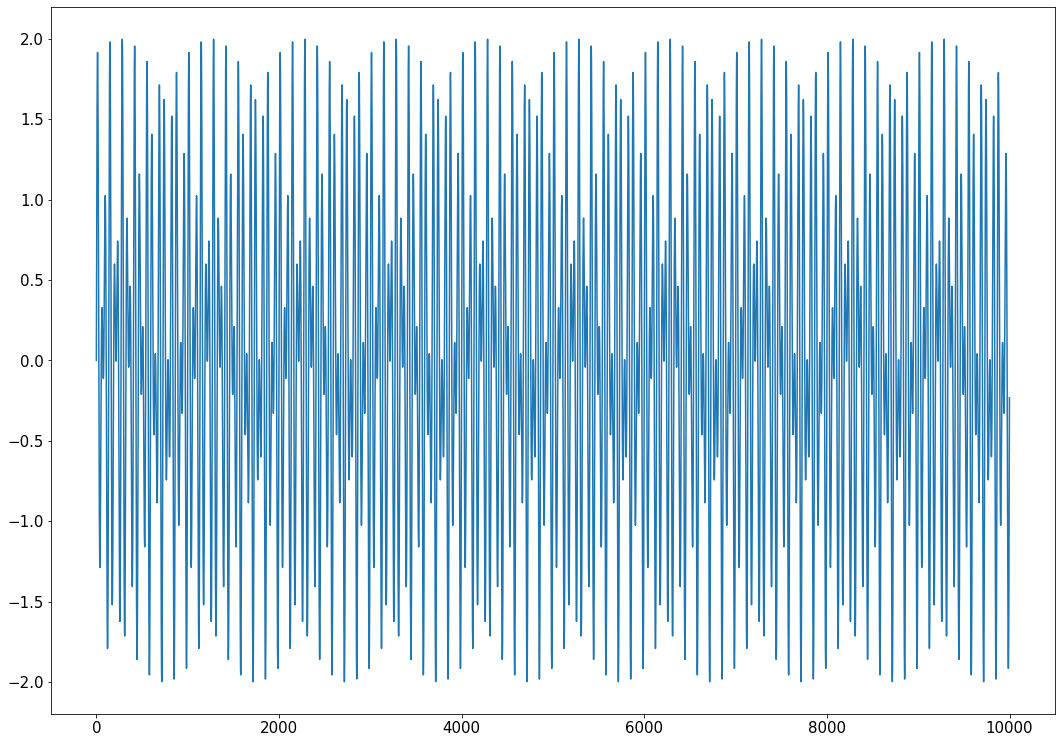

In [140]:
plt.plot(f_clean) # this is the original form

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


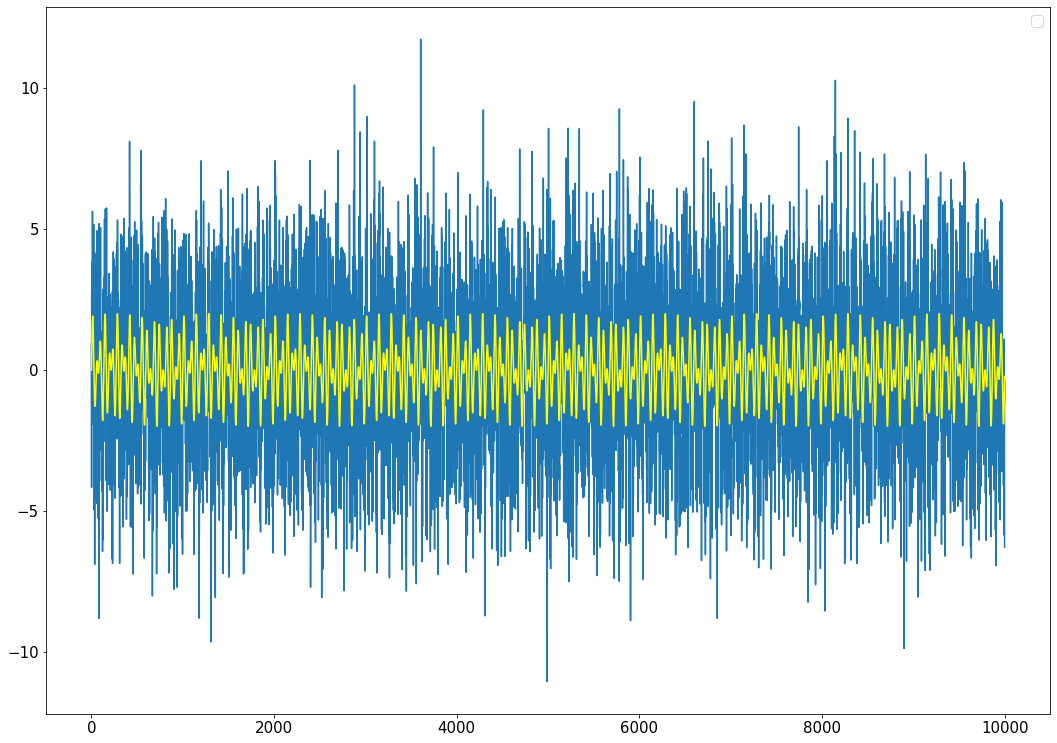

In [141]:
plt.plot(f,)
plt.plot(f_clean,color='yellow') # this is the noised and real-signal form.
plt.legend() # here we can see our noisey and clean data frequencies.

In [142]:
# Let's bring up some FFT
n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat)/n  # Power spectrum -- (Power per frequency)
freq = (1/(dt*n)) * np.arange(n)  # X-axis ---> for Frequency
L = np.arange(1,np.floor(n/2),dtype='int')  # the firdt half of the frequencies.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


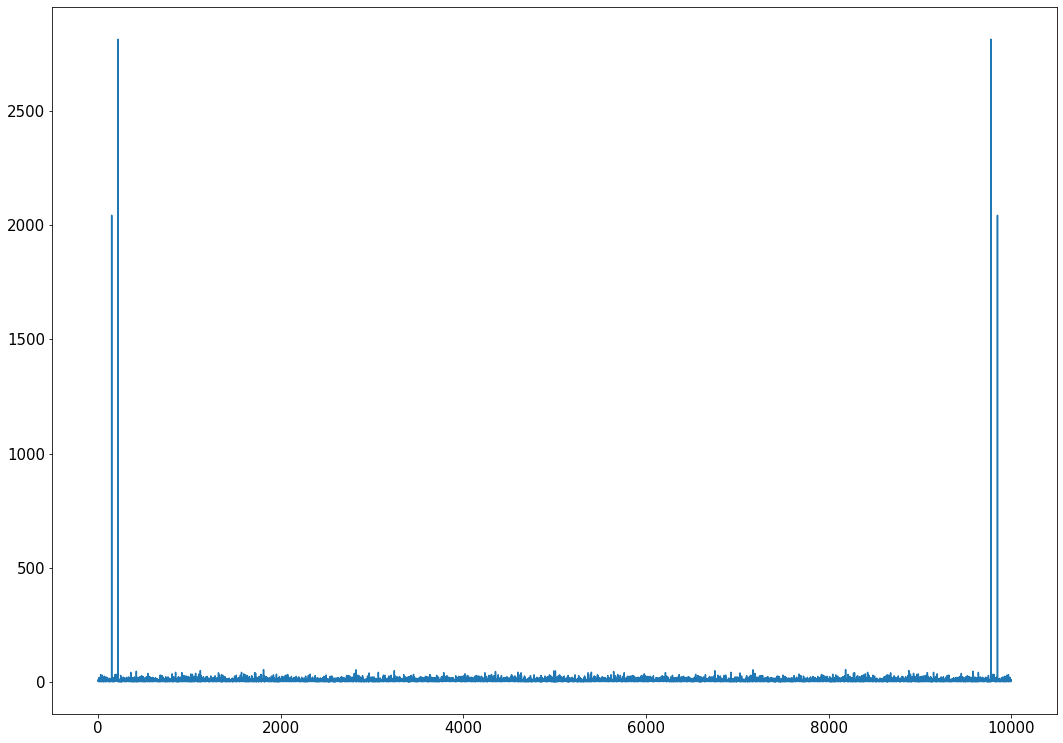

In [143]:
plt.plot(PSD,)

In [144]:
# now, we will make use of PSD to remove the noices.
indices = PSD > 100

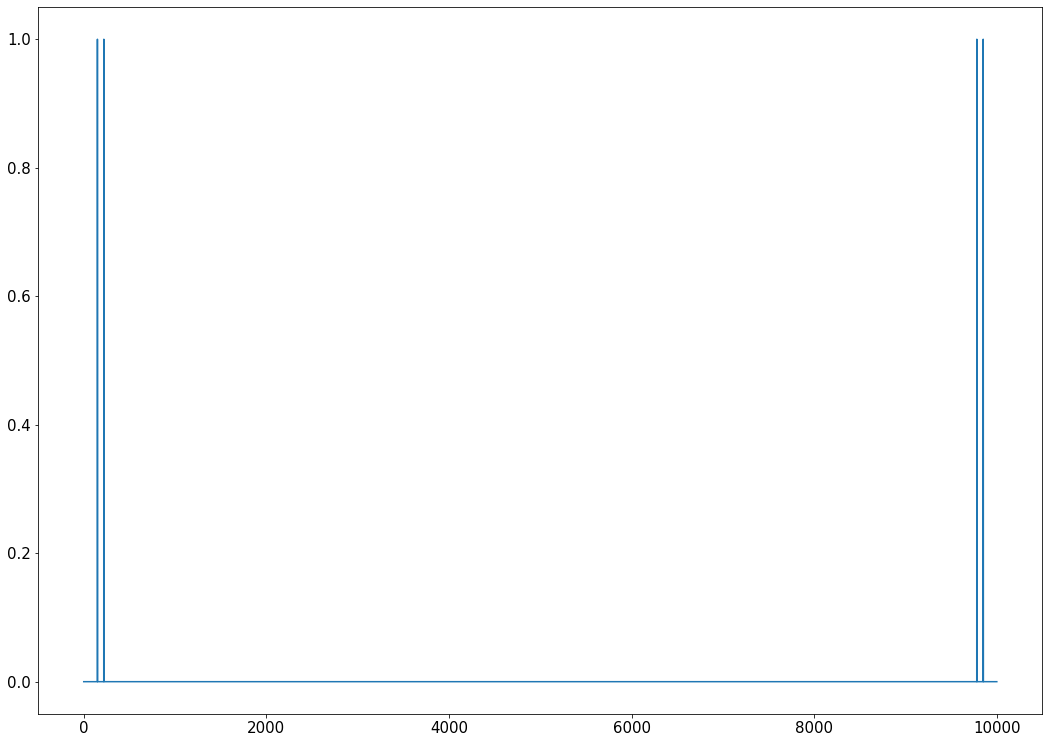

In [145]:
plt.plot(indices,)

In [146]:
PSDclean = PSD * indices

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


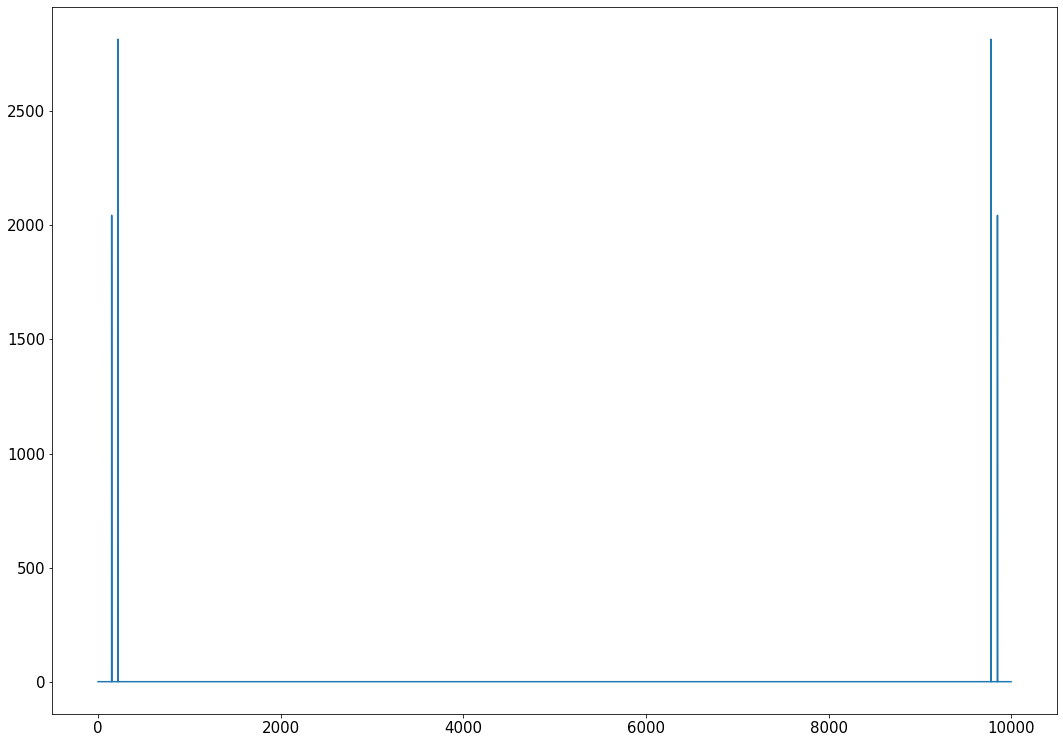

In [147]:
plt.plot(PSDclean)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


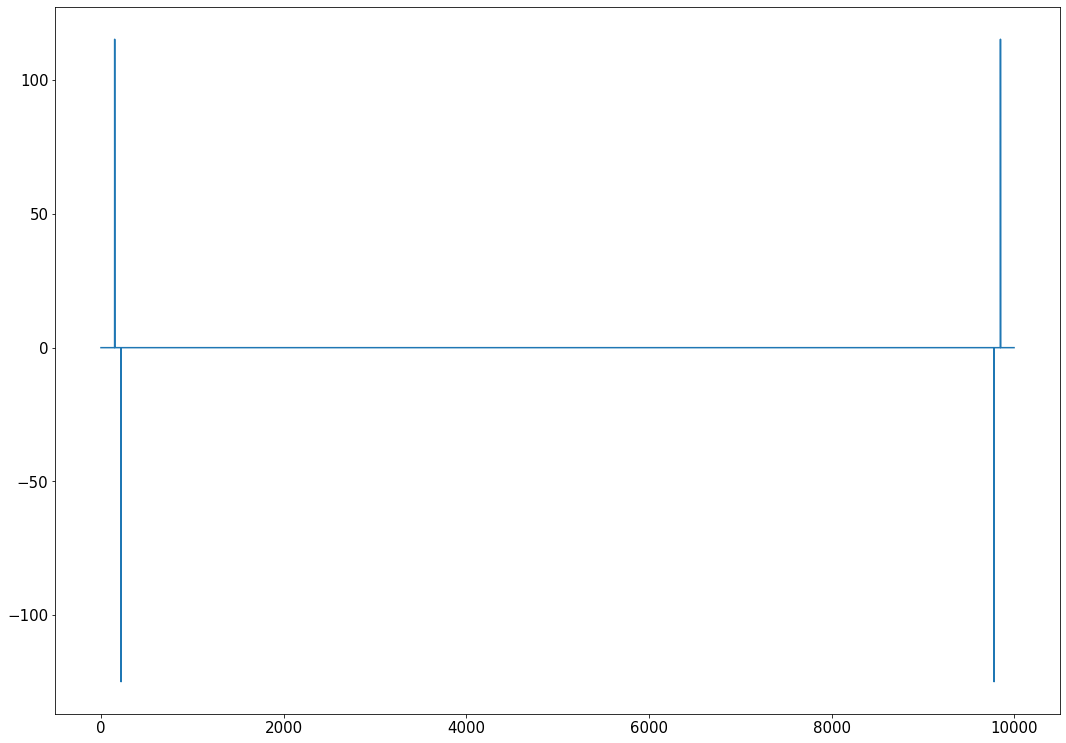

In [148]:
fhat = indices * fhat
plt.plot(fhat,)

In [149]:
ffilt = np.fft.ifft(fhat)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


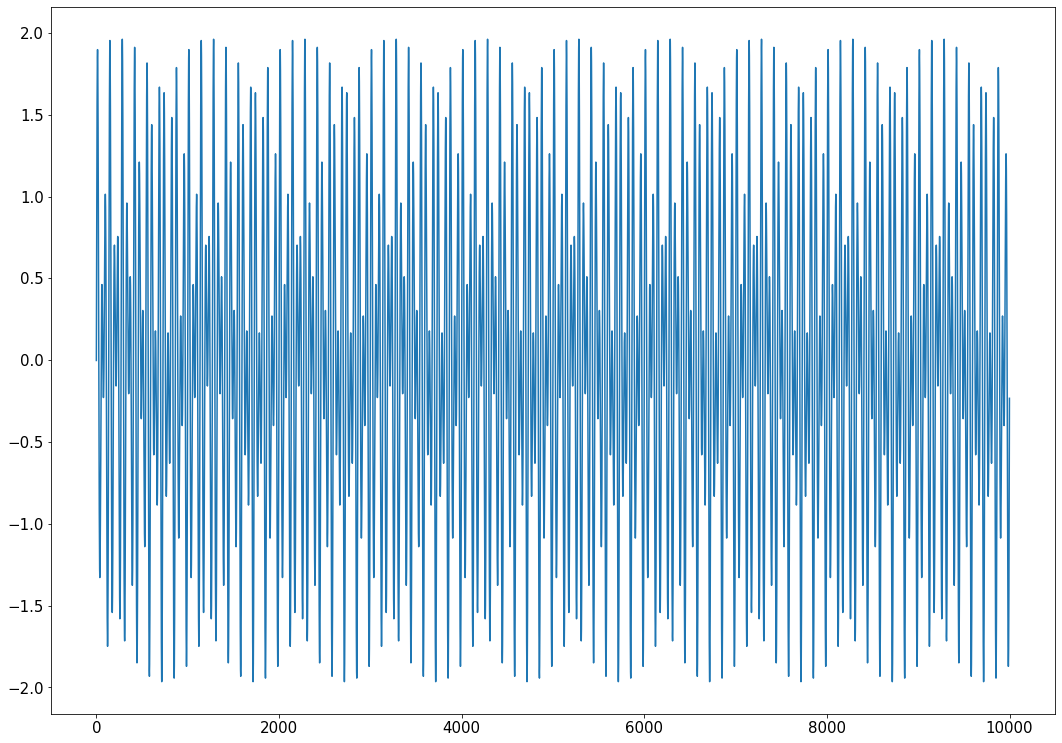

In [150]:
plt.plot(ffilt)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


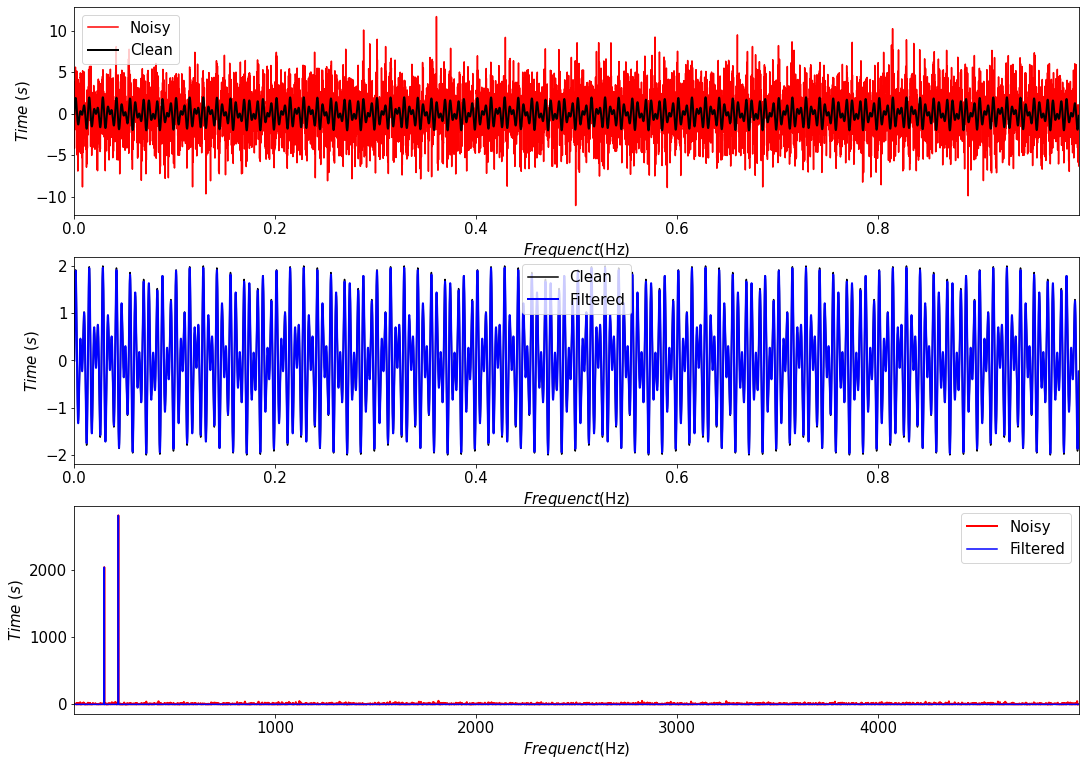

In [151]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.ylabel('$Time$ ($s$)')
plt.xlabel('$Frequenct ($Hz$)$')
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.ylabel('$Time$ ($s$)')
plt.xlabel('$Frequenct ($Hz$)$')
plt.legend()


plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.ylabel('$Time$ ($s$)')
plt.xlabel('$Frequenct ($Hz$)$')
plt.legend()

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


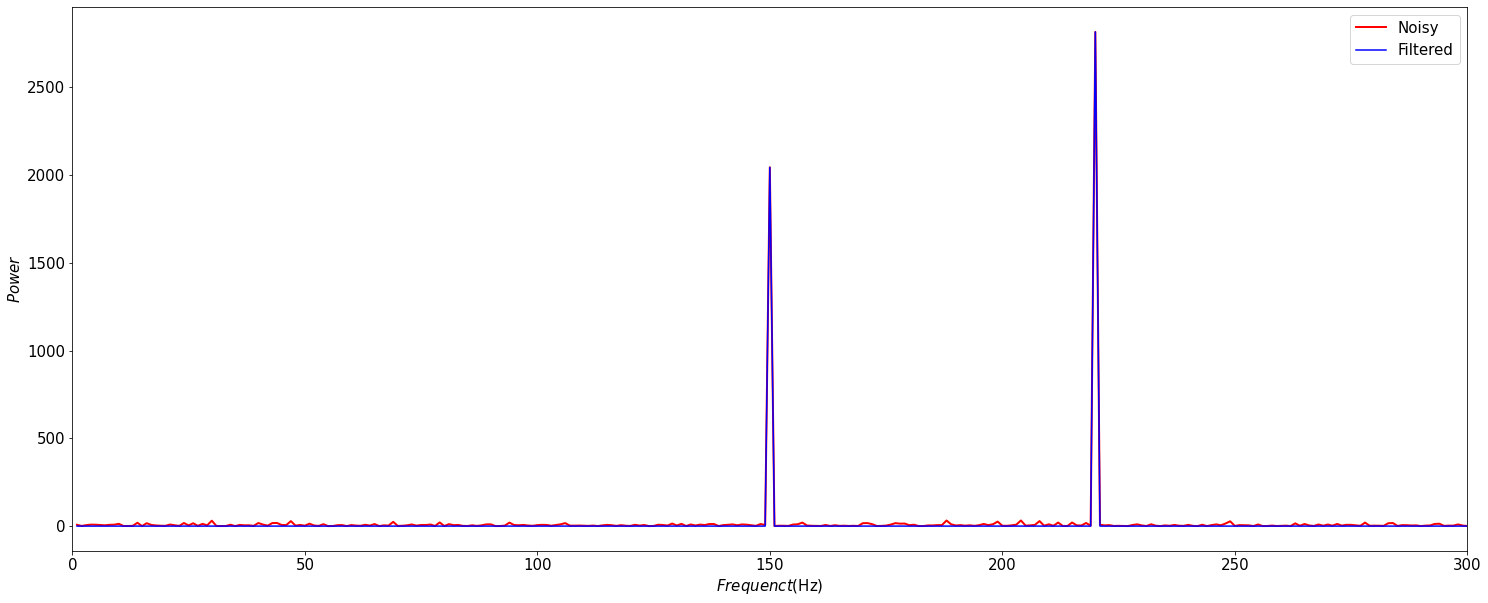

In [153]:
fig = plt.figure()
fig.set_size_inches(25,10)
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.ylabel('$Power$')
plt.xlabel('$Frequenct ($Hz$)$')
plt.xlim(0,300)
plt.legend()
plt.show()
# Zoomed in view for the 3rd graph   .......
# It shows that most of the signals or power is comming form 150Hz and 220Hz fregency, that is which we have in the original grame.